# Instalar dash

In [97]:
%pip install dash

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
%pip install dash-bootstrap-components


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Instalar Geopandas y Geopy

In [99]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Instalar Folium
    Para mapa burbujas

In [101]:
%pip install folium 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Libreries

In [160]:
import mysql.connector
import pandas as pd

import os
from dotenv import load_dotenv # type: ignore # per dades accedir base dades


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # per poder utilitzar FuncFormatter i aplicar format a la barra
from matplotlib.ticker import FuncFormatter # per poder utilitzar el separador de milersimport geopandas as gpd

from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

import time
from geopy.exc import GeocoderTimedOut

import folium
from folium.plugins import MarkerCluster
 
from tabulate import tabulate # para formato de una tabla

# Carregar credencials base de dades: arxiu .env

In [152]:
load_dotenv()

DB_HOST = os.getenv('host')
DB_USER = os.getenv('usuario')
DB_PASSWORD = os.getenv('clave')
DB_DATABASE = os.getenv('db')

# connectar

In [153]:

try:
    # Pas 1: Connexió a la base de dades
    db_connection = mysql.connector.connect(
        host=DB_HOST,
        user=DB_USER,
        password=DB_PASSWORD,
        database=DB_DATABASE
    )

    print("Connexió realitzada amb èxit a la base de dades.")

except mysql.connector.Error as err:
    print(f"Error al conectar a la base de dades: {err}")

cursor = db_connection.cursor()
cursor.execute("SHOW TABLES")
MySQL_tables = [table[0] for table in cursor.fetchall()]

DataFrames = {}
cursor = db_connection.cursor(dictionary=True)
for table in MySQL_tables:
    cursor.execute(f"SELECT * FROM {table}")
    DataFrames[f"df{table}"] = pd.DataFrame(cursor.fetchall())

print(DataFrames.keys())
locals().update(DataFrames)

cursor.close()
db_connection.close()


Connexió realitzada amb èxit a la base de dades.
dict_keys(['dfTourist_Accommodation'])


# Funciones

## Función para añadir el símbolo € a los valores del eje

In [104]:
def euro_formatter(x, pos):
    return f"{x:,.0f}€"  # Format amb 0 

## Función para formatear el eje y con separador de miles

In [105]:
def formato_miles(x, pos):
    return f'{int(x):,}'

# Establecer paleta y estilo

In [106]:
sns.set_style("darkgrid")
sns.set_palette("tab10") 

# 01 EDA centrado en Márqueting y Comunicación
    Es para un negocio de alquiler de alojamientos turísticos

## 001 Mostrar el head() de cada DataFrame cargado para ver datos

In [107]:
for table_name, df in DataFrames.items():
    print(f"Head of {table_name}:")
    print(df.head())
    print("\n")


Head of dfTourist_Accommodation:
   apartment_id                                               name  \
0         11964                                 A ROOM WITH A VIEW   
1         21853                               Bright and airy room   
2         32347  Explore Cultural Sights from a Family-Friendly...   
3         35379                  Double 02 CasanovaRooms Barcelona   
4         35801                  Can Torras Farmhouse Studio Suite   

                                         description  host_id  \
0  Private bedroom in our attic apartment. Right ...    45553   
1  We have a quiet and sunny room with a good vie...    83531   
2  Open French doors and step onto a plant-filled...   139939   
3  Room at a my apartment. Kitchen and 2 bathroom...   152232   
4  Lay in bed & watch sunlight change the mood of...   153805   

                neighbourhood_name neighbourhood_district        room_type  \
0                           Centro                   None     Private room   

## 002 Análisis Descriptivo
    Resumen descriptivo de los datos

### 002-1 Para variables numéricas

In [108]:
print(df.describe()) 

       apartment_id       host_id  accommodates         beds        price  \
count  7.001000e+03  7.001000e+03   7001.000000  6998.000000  6870.000000   
mean   1.511978e+07  6.218673e+07      4.351807     3.013575  1011.098108   
std    7.715578e+06  5.747094e+07      2.620646     2.330849   845.975377   
min    1.196400e+04  1.070400e+04      1.000000     0.000000    60.000000   
25%    8.749646e+06  1.050015e+07      2.000000     1.000000   450.000000   
50%    1.673706e+07  4.261380e+07      4.000000     2.000000   750.000000   
75%    2.146321e+07  1.062896e+08      6.000000     4.000000  1230.000000   
max    2.724512e+07  3.365242e+08     29.000000    30.000000  6071.000000   

       minimum_nights  maximum_nights  availability_30  availability_60  \
count     7001.000000     7001.000000      7001.000000      7001.000000   
mean         4.424939      759.467647        12.277389        27.419940   
std         10.669575      497.964843        11.510798        22.413425   
min   

### 002-2 Para detalles generales sobre el tipo de datos y valores nulos

In [109]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 7001 non-null   int64  
 1   name                         6998 non-null   object 
 2   description                  6972 non-null   object 
 3   host_id                      7001 non-null   int64  
 4   neighbourhood_name           7001 non-null   object 
 5   neighbourhood_district       4241 non-null   object 
 6   room_type                    7001 non-null   object 
 7   accommodates                 7001 non-null   int64  
 8   bathrooms                    6969 non-null   object 
 9   bedrooms                     6972 non-null   object 
 10  beds                         6998 non-null   float64
 11  amenities_list               6984 non-null   object 
 12  price                        6870 non-null   float64
 13  minimum_nights    

## 003 Distribución de Precios
    El precio es un factor clave para los clientes, por lo que exploramos su distribución.

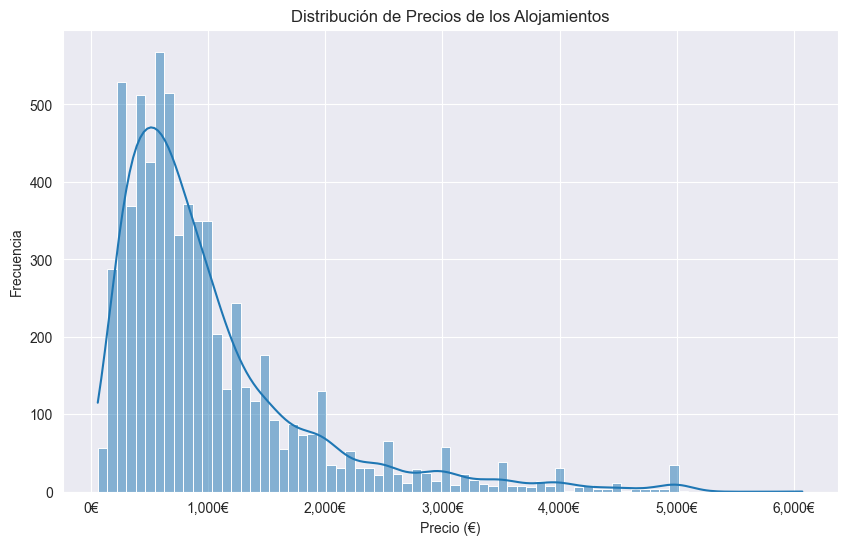

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True) #, color='blue')
plt.title('Distribución de Precios de los Alojamientos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
# Aplicar el formatter al eje X para mostrar el símbolo €
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-1 Distribución de Precios por Ciudad
    El precio puede variar dependiendo de la ubicación, y es importante identificar si hay ciudades más rentables que otras.

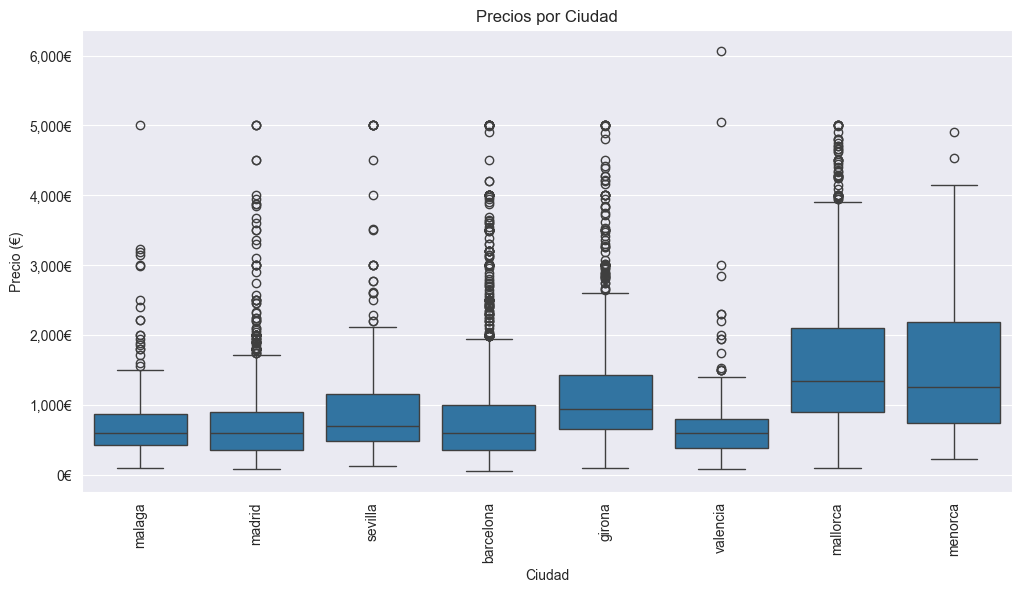

In [111]:
# Boxplot de precios por ciudad
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df)
plt.title('Precios por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.xticks(rotation=90)
plt.show()

### 003-2 Distribución de Precios por Tipo de Alojamiento
    El tipo de alojamiento también afecta la estrategia de precios

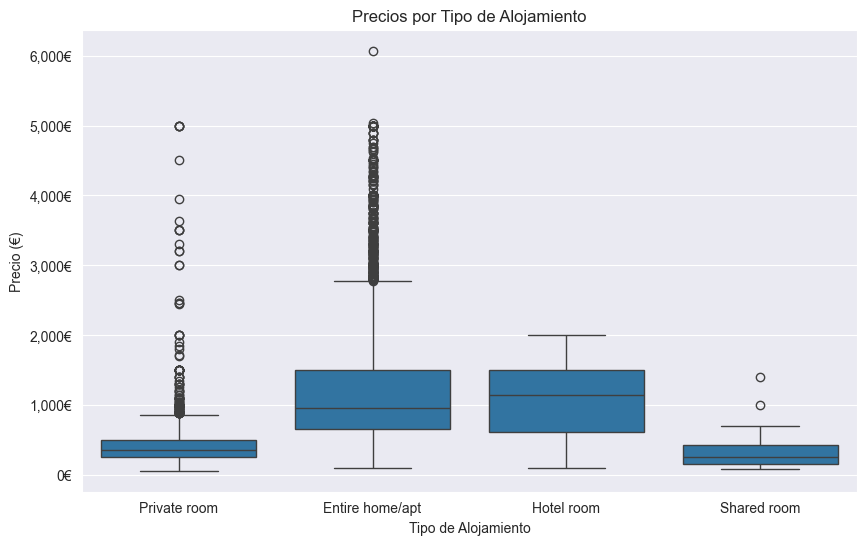

In [112]:
# Boxplot de precios por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precios por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-3 Distribución de Precios por Número de Camas

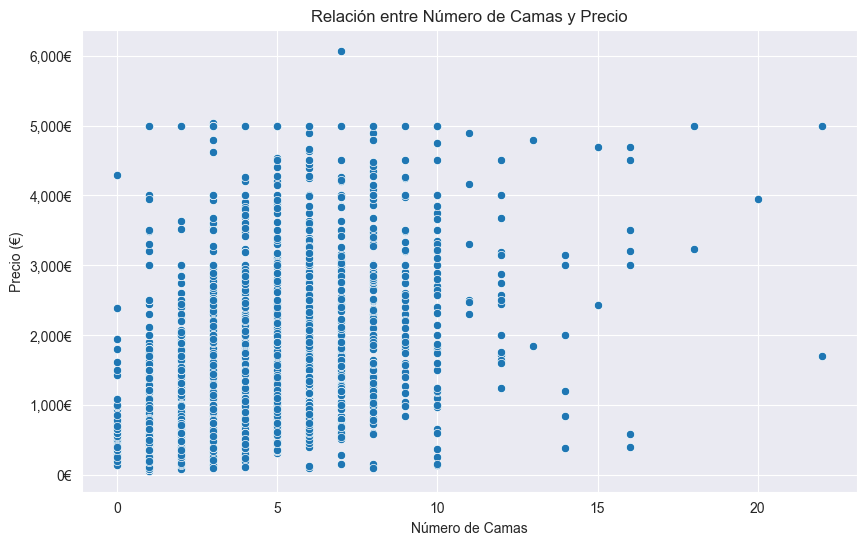

In [113]:
# Relación entre el número de camas y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='price', data=df)
plt.title('Relación entre Número de Camas y Precio')
plt.xlabel('Número de Camas')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

### 003-4 Distribución de Precios por Número de Habitaciones

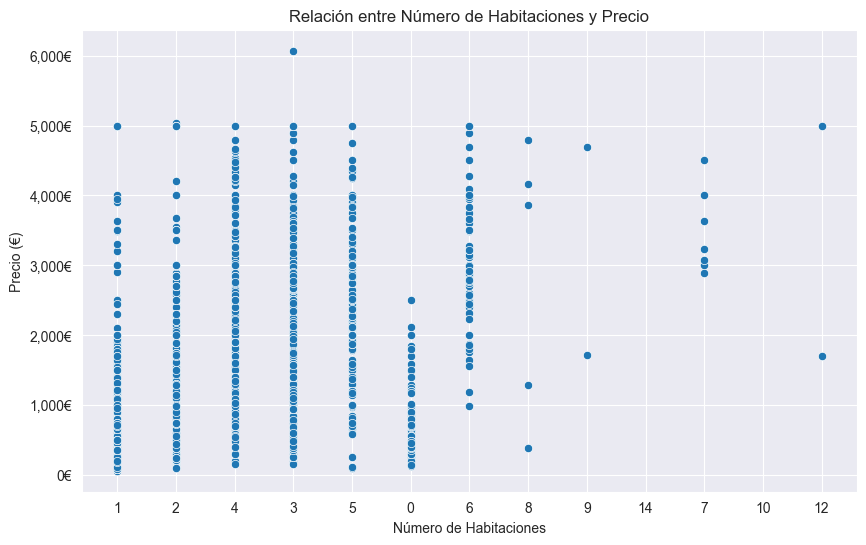

In [114]:
# Relación entre el número de habitaciones y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Relación entre Número de Habitaciones y Precio')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio (€)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(euro_formatter))
plt.show()

## 004 Disponibilidad y Estrategias de Marketing
    La disponibilidad es clave, ya que si un alojamiento está constantemente lleno, su visibilidad y estrategias de marketing podrían necesitar ajustes. Además, el análisis de la reserva instantánea también es crucial para optimizar las tasas de conversión.

#### 004-1 Distribución de Disponibilidad en 30 días

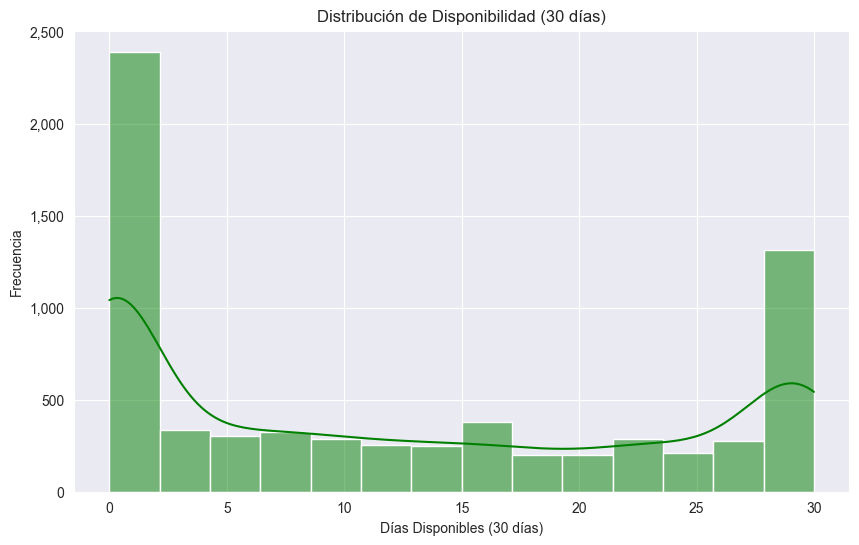

In [115]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_30'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (30 días)')
plt.xlabel('Días Disponibles (30 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-2 Distribución de Disponibilidad en 60 días

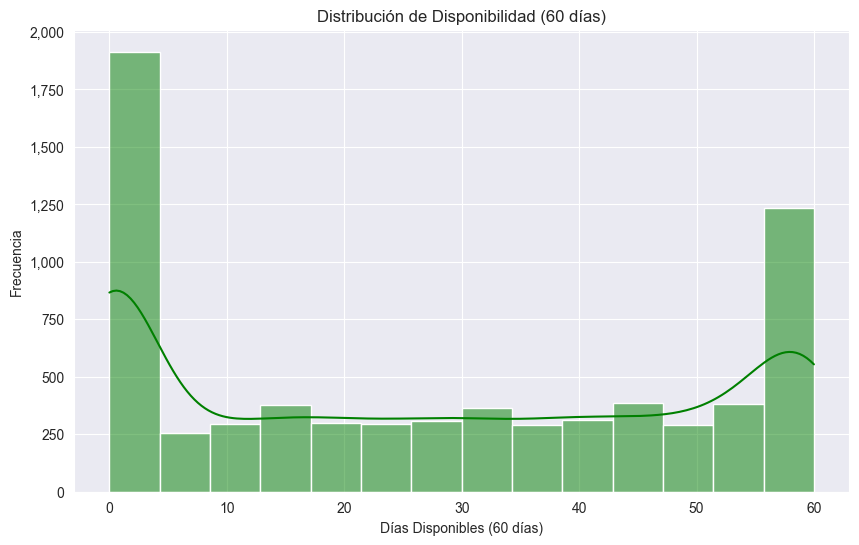

In [116]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_60'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (60 días)')
plt.xlabel('Días Disponibles (60 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-3 Distribución de Disponibilidad en 90 días

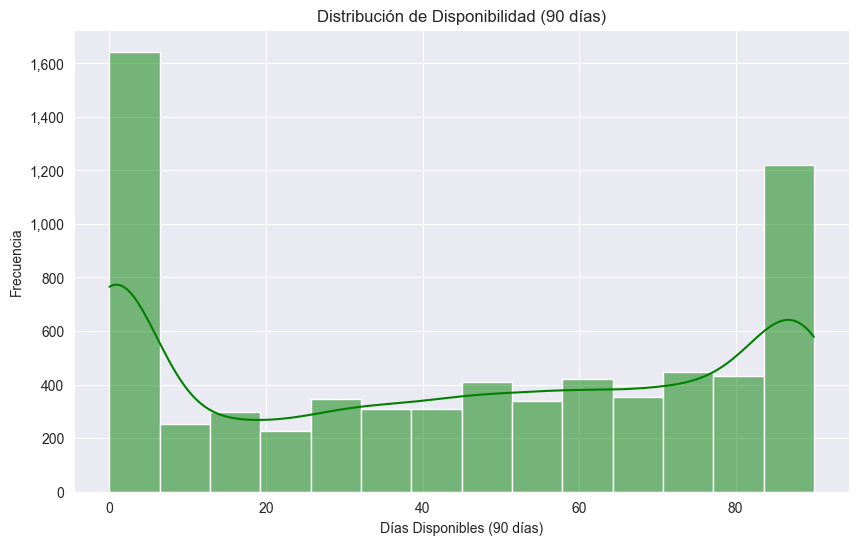

In [117]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_90'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (90 días)')
plt.xlabel('Días Disponibles (90 días)')
plt.ylabel('Frecuencia')
plt.show()

#### 004-4 Distribución de Disponibilidad en 365 días

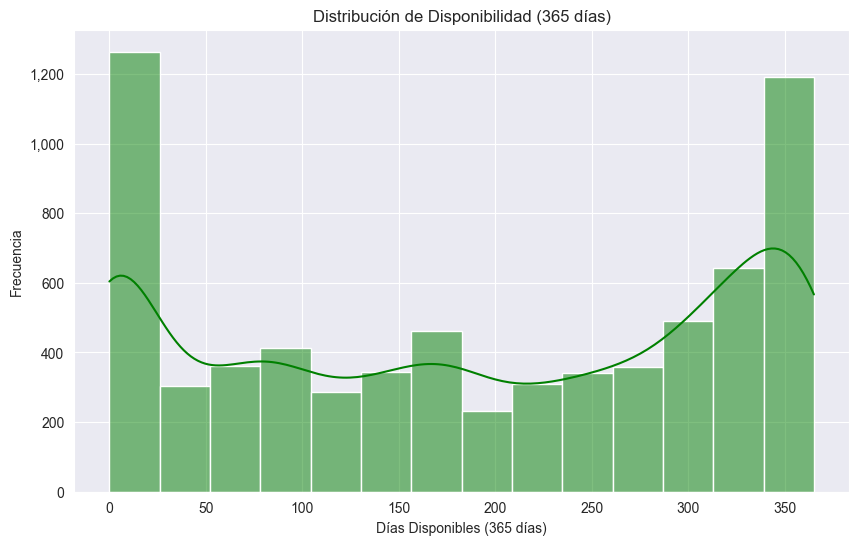

In [118]:
# Histograma de disponibilidad
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], kde=True, color='green')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Disponibilidad (365 días)')
plt.xlabel('Días Disponibles (365 días)')
plt.ylabel('Frecuencia')
plt.show()



## 005 Reserva Instantánea y Comunicación
    Verificar cuántos alojamientos permiten la reserva instantánea.
    La reserva instantánea es un factor clave en la experiencia del usuario. Si la mayoría de los alojamientos tienen esta opción, se puede centrar la comunicación en la conveniencia y rapidez del proceso.

### 005-1 Ver el porcentaje de alojamientos con reserva instantánea

In [119]:
instant_bookable_percentage = df['is_instant_bookable'].value_counts(normalize=True) * 100
print(instant_bookable_percentage)

is_instant_bookable
VERDADERO    53.42094
FALSO        46.57906
Name: proportion, dtype: float64


### 005-2 Gráfico de la distribución de alojamientos con reserva instantánea

C:\Users\Albert\AppData\Local\Temp\ipykernel_27312\1596701451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_instant_bookable', data=df, palette='viridis')


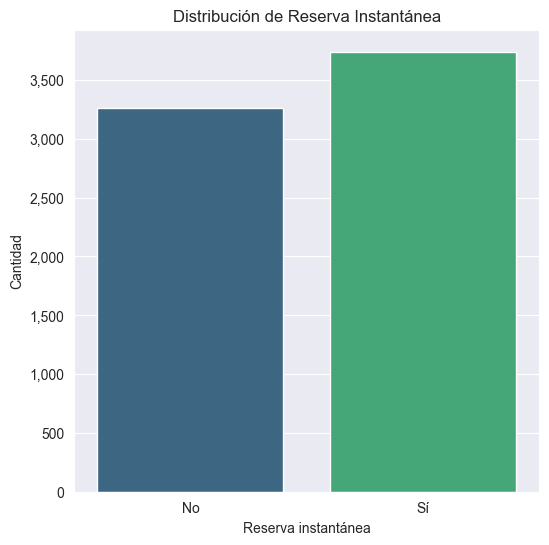

In [120]:
plt.figure(figsize=(6, 6))
sns.countplot(x='is_instant_bookable', data=df, palette='viridis')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Reserva instantánea')
plt.ylabel('Cantidad')
plt.title('Distribución de Reserva Instantánea')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

## 006 Análisis de Reseñas
    Las reseñas son un factor determinante en la decisión del cliente. Vamos a analizar tanto la cantidad de reseñas como la puntuación.

### 006-1 Número de Reseñas y Puntuaciones
    La cantidad de reseñas y la puntuación promedio pueden indicar la popularidad y calidad de los alojamientos.

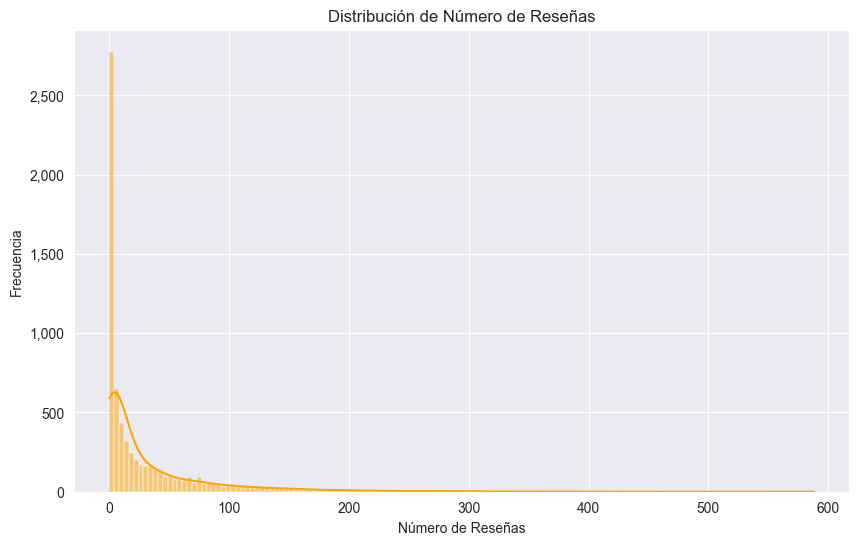

In [121]:
# Histograma de número de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], kde=True, color='orange')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.title('Distribución de Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()


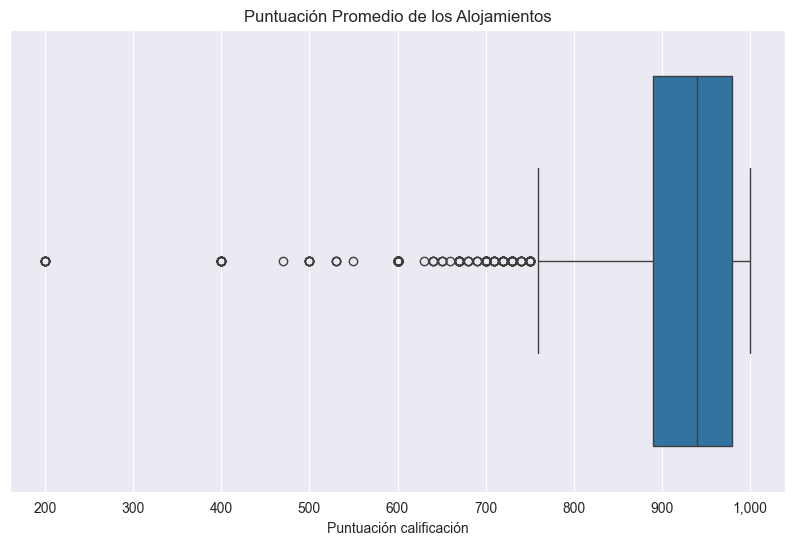

In [122]:
 # Boxplot de puntuaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_scores_rating', data=df)

plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Puntuación calificación')
plt.title('Puntuación Promedio de los Alojamientos')
plt.show()

### 006-2 Puntuaciones por Tipo de Alojamiento

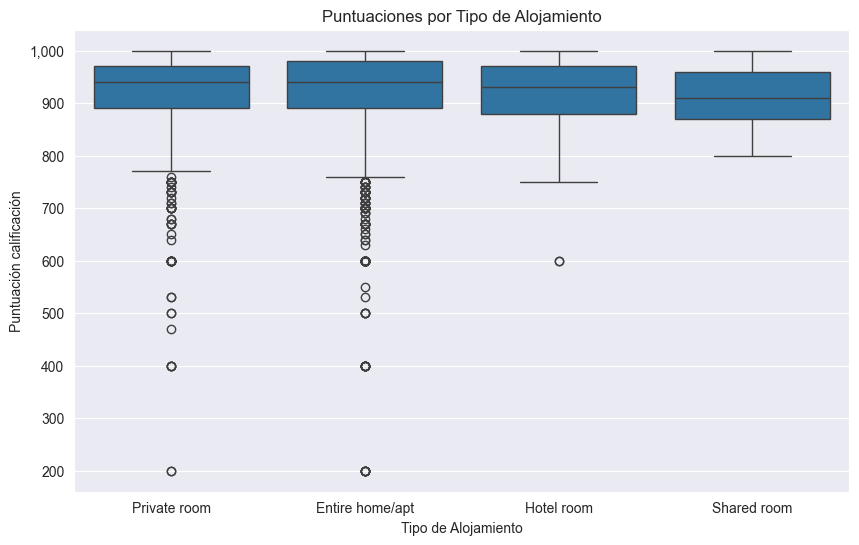

In [123]:
# Boxplot de puntuaciones por tipo de alojamiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='review_scores_rating', data=df)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Puntuación calificación')
plt.title('Puntuaciones por Tipo de Alojamiento')
plt.show()

## 007 Geocodificación para obtener las coordenadas (Latitud y Longitud)

In [124]:
# Inicializar el geolocalizador con un user_agent único
geolocator = Nominatim(user_agent="mi_aplicacion_de_geolocalizacion")

# Función para geolocalizar con reintentos
def geocode_with_retry(location_query, retries=3, delay=2):
    for _ in range(retries):
        try:
            location = geolocator.geocode(location_query, timeout=10)  # Intentar obtener las coordenadas
            if location:
                return location.latitude, location.longitude  # Devolver latitud y longitud
            else:
                return None, None  # Si no se encontró la ubicación, devolver None
        except GeocoderTimedOut:
            time.sleep(delay)  # Si hay un error de timeout, esperar y reintentar
    return None, None  # Si los reintentos fallan, devolver None

# Función para aplicar geocode_with_retry al DataFrame
def geocode_location(row, retries=3, delay=2):
    # Verificar que las columnas necesarias no tengan valores nulos
    if pd.notnull(row['neighbourhood_name']) and pd.notnull(row['city']):
        # Si neighbourhood_district es nulo, se omite
        location_query = f"{row['neighbourhood_name']}, {row['neighbourhood_district'] if pd.notnull(row['neighbourhood_district']) else ''}, {row['city']}, España"
        return geocode_with_retry(location_query, retries, delay)
    else:
        return None, None  # Retornar None si alguna columna clave está vacía

# Aplicar la función para obtener latitud y longitud
df[['latitude', 'longitude']] = df.apply(geocode_location, axis=1, result_type="expand")

# Verificar que las coordenadas se han añadido correctamente
print(df[['apartment_id', 'neighbourhood_name', 'neighbourhood_district', 'city', 'country', 'latitude', 'longitude']].head())


   apartment_id               neighbourhood_name neighbourhood_district  \
0         11964                           Centro                   None   
1         21853                         C�rmenes                 Latina   
2         32347                      San Vicente          Casco Antiguo   
3         35379  l'Antiga Esquerra de l'Eixample               Eixample   
4         35801                            Quart                   None   

        city country   latitude  longitude  
0     malaga   spain  36.724869  -4.418305  
1     madrid   spain        NaN        NaN  
2    sevilla   spain  37.395932  -5.999576  
3  barcelona   spain  41.390000   2.155000  
4     girona   spain  41.940159   2.841352  


#### 007 Mapa

In [125]:
# Filtrar los apartamentos que tienen latitud y longitud no nulas
df_filtered = df.dropna(subset=['latitude', 'longitude'])

# Verificar que las coordenadas han sido asignadas correctamente
print(df_filtered[['apartment_id', 'neighbourhood_name', 'city', 'latitude', 'longitude', 'price']].head())

   apartment_id               neighbourhood_name       city   latitude  \
0         11964                           Centro     malaga  36.724869   
2         32347                      San Vicente    sevilla  37.395932   
3         35379  l'Antiga Esquerra de l'Eixample  barcelona  41.390000   
4         35801                            Quart     girona  41.940159   
7         71603           la Dreta de l'Eixample  barcelona  41.395037   

   longitude   price  
0  -4.418305   400.0  
2  -5.999576   990.0  
3   2.155000   400.0  
4   2.841352   900.0  
7   2.167207  3900.0  


#### 007-1 Crear mapa de burbujas

In [126]:
# Crear el mapa centrado en una ubicación general (Madrid, España en este caso)
m = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Inicializar MarkerCluster para agrupar marcadores cercanos
marker_cluster = MarkerCluster().add_to(m)

# Normalizar el tamaño de las burbujas según el precio
# Dividimos el precio por un factor para hacer los tamaños manejables
df_filtered['bubble_size'] = df_filtered['price'] / 100  # Ajusta el divisor para cambiar el tamaño de la burbuja

# Añadir burbujas (marcadores de círculo) al mapa
for idx, row in df_filtered.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],  # Coordenadas del apartamento
        radius=row['bubble_size'],  # Tamaño de la burbuja en función del precio
        color='blue',  # Color del borde
        fill=True, 
        fill_color='blue',  # Color de relleno
        fill_opacity=0.6,  # Opacidad del relleno
        popup=f"Apartment ID: {row['apartment_id']}<br>Price: {row['price']}€",  # Información en el popup
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
m.save("mapa_con_burbujas.html")

# Mostrar el mapa en el entorno de trabajo (si usas un notebook Jupyter)
m

C:\Users\Albert\AppData\Local\Temp\ipykernel_27312\3138207387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bubble_size'] = df_filtered['price'] / 100  # Ajusta el divisor para cambiar el tamaño de la burbuja


# Pregunta de negocio:
    Analista de Màrqueting i Estratègia Comercial: Quin és el preu mitjà dels allotjaments per tipus
d'allotjament a cada ciutat?

In [170]:
# Agrupar por ciudad y tipo de alojamiento, luego calcular el precio medio
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

# Renombrar las columnas para mayor claridad
precio_medio.columns = ['Ciudad', 'Tipo de alojamiento', 'Precio medio']

# Formatear el precio medio con 2 decimales y separador de miles
precio_medio['Precio medio'] = precio_medio['Precio medio'].apply(lambda x: f"{x:,.2f}€")

# Mostrar los primeros resultados
print(precio_medio.head())



      Ciudad Tipo de alojamiento Precio medio
0  barcelona     Entire home/apt    1,295.79€
1  barcelona          Hotel room    1,444.29€
2  barcelona        Private room      455.28€
3  barcelona         Shared room      373.33€
4     girona     Entire home/apt    1,229.50€


In [171]:
# Mostrar todas los resultados
print(precio_medio)

       Ciudad Tipo de alojamiento Precio medio
0   barcelona     Entire home/apt    1,295.79€
1   barcelona          Hotel room    1,444.29€
2   barcelona        Private room      455.28€
3   barcelona         Shared room      373.33€
4      girona     Entire home/apt    1,229.50€
5      girona          Hotel room      625.00€
6      girona        Private room      602.12€
7      madrid     Entire home/apt      938.57€
8      madrid          Hotel room      902.50€
9      madrid        Private room      370.88€
10     madrid         Shared room      313.33€
11     malaga     Entire home/apt      817.33€
12     malaga          Hotel room      703.33€
13     malaga        Private room      361.38€
14     malaga         Shared room      143.33€
15   mallorca     Entire home/apt    1,713.20€
16   mallorca          Hotel room    1,401.67€
17   mallorca        Private room      709.76€
18   mallorca         Shared room      493.33€
19    menorca     Entire home/apt    1,647.30€
20    menorca

## Código para crear la tabla pivote con el precio medio:

In [173]:
# Agrupar por ciudad y tipo de alojamiento, luego calcular el precio medio
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

# Crear la tabla pivote
tabla_pivote = precio_medio.pivot_table(index='city', columns='room_type', values='price', aggfunc='mean')

# Formatear el precio medio con 2 decimales, separador de miles y símbolo de euro
tabla_pivote = tabla_pivote.applymap(lambda x: f"{x:,.2f}€" if pd.notnull(x) else x)

# Para reemplazar por 0 si NaN
tabla_pivote = tabla_pivote.fillna('0.00€')

# Mostrar la tabla pivote resultante
print(tabla_pivote)

room_type Entire home/apt Hotel room Private room Shared room
city                                                         
barcelona       1,295.79€  1,444.29€      455.28€     373.33€
girona          1,229.50€    625.00€      602.12€       0.00€
madrid            938.57€    902.50€      370.88€     313.33€
malaga            817.33€    703.33€      361.38€     143.33€
mallorca        1,713.20€  1,401.67€      709.76€     493.33€
menorca         1,647.30€      0.00€      574.55€       0.00€
sevilla         1,046.24€    918.57€      599.03€     120.00€
valencia          794.48€    955.00€      341.18€     203.33€


In [174]:
# Agrupar por ciudad y tipo de alojamiento, luego calcular el precio medio
precio_medio = df.groupby(['city', 'room_type'])['price'].mean().reset_index()

# Crear la tabla pivote
tabla_pivote = precio_medio.pivot_table(index='city', columns='room_type', values='price', aggfunc='mean')

# Ordenar la tabla pivote de mayor a menor en cada columna
tabla_pivote_sorted = tabla_pivote.apply(lambda x: x.sort_values(ascending=False), axis=0)

# Formatear el precio medio con 2 decimales, separador de miles y símbolo de euro
tabla_pivote_sorted = tabla_pivote_sorted.applymap(lambda x: f"{x:,.2f}€" if pd.notnull(x) else x)

# Para reemplazar por 0 si NaN
tabla_pivote_sorted = tabla_pivote_sorted.fillna('0.00€')

# Visualizar la tabla pivote ordenada
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_pivote_sorted.astype(float), annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, cbar_kws={'label': 'Precio medio (€)'})
plt.title('Precio Medio de Alojamientos por Ciudad y Tipo de Alojamiento')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Mostrar la tabla pivote ordenada
print(tabla_pivote_sorted)

ValueError: could not convert string to float: '1,295.79€'

<Figure size 1000x600 with 0 Axes>

# KPI 1 - Tasa de ocupación mensual

In [ ]:
# Suponiendo que 'availability_30' es el número de días disponibles en los últimos 30 días

# Calcular el número de días ocupados
df['days_occupied'] = 30 - df['availability_30']  # Si 'availability_30' tiene los días disponibles, restamos a 30

# Calcular la tasa de ocupación mensual
df['occupancy_rate'] = (df['days_occupied'] / 30) * 100  # Tasa de ocupación en porcentaje

# Mostrar las primeras filas con el KPI calculado
print(df[['apartment_id', 'city', 'room_type', 'availability_30', 'days_occupied', 'occupancy_rate']].head())


   apartment_id       city        room_type  availability_30  days_occupied  \
0         11964     malaga     Private room                7             23   
1         21853     madrid     Private room                0             30   
2         32347    sevilla  Entire home/apt               26              4   
3         35379  barcelona     Private room                9             21   
4         35801     girona     Private room                0             30   

   occupancy_rate  
0       76.666667  
1      100.000000  
2       13.333333  
3       70.000000  
4      100.000000  


In [166]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Mostrar el KPI por ciudad y tipo de alojamiento
print(kpi_occupancy)

        city occupancy_rate
0  barcelona         63.11%
1     girona         51.29%
2     madrid         65.42%
3     malaga         59.30%
4   mallorca         55.01%
5    menorca         50.09%
6    sevilla         53.87%
7   valencia         54.93%


## KPI 1 - Tasa de ocupación por tipo de alojamiento:
    KPI de ocupación promedio por ciudad y tipo de alojamiento.

In [165]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Mostrar el KPI por ciudad y tipo de alojamiento
print(kpi_occupancy)

         city        room_type occupancy_rate
0   barcelona  Entire home/apt         63.89%
1   barcelona       Hotel room         58.10%
2   barcelona     Private room         62.82%
3   barcelona      Shared room         41.67%
4      girona  Entire home/apt         51.35%
5      girona       Hotel room         80.00%
6      girona     Private room         47.76%
7      madrid  Entire home/apt         63.93%
8      madrid       Hotel room         71.33%
9      madrid     Private room         68.94%
10     madrid      Shared room         40.67%
11     malaga  Entire home/apt         59.28%
12     malaga       Hotel room         33.33%
13     malaga     Private room         59.89%
14     malaga      Shared room         76.67%
15   mallorca  Entire home/apt         55.52%
16   mallorca       Hotel room         73.33%
17   mallorca     Private room         46.31%
18   mallorca      Shared room         76.67%
19    menorca  Entire home/apt         49.64%
20    menorca     Private room    

## KPI 1 - Tasa de ocupación agrupada por ciudad y tipo de alojamiento en %

In [156]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Mostrar el KPI por ciudad y tipo de alojamiento
print(kpi_occupancy)


         city        room_type occupancy_rate
0   barcelona  Entire home/apt         63.89%
1   barcelona       Hotel room         58.10%
2   barcelona     Private room         62.82%
3   barcelona      Shared room         41.67%
4      girona  Entire home/apt         51.35%
5      girona       Hotel room         80.00%
6      girona     Private room         47.76%
7      madrid  Entire home/apt         63.93%
8      madrid       Hotel room         71.33%
9      madrid     Private room         68.94%
10     madrid      Shared room         40.67%
11     malaga  Entire home/apt         59.28%
12     malaga       Hotel room         33.33%
13     malaga     Private room         59.89%
14     malaga      Shared room         76.67%
15   mallorca  Entire home/apt         55.52%
16   mallorca       Hotel room         73.33%
17   mallorca     Private room         46.31%
18   mallorca      Shared room         76.67%
19    menorca  Entire home/apt         49.64%
20    menorca     Private room    

## KPI 1 - Matriz Tasa de ocupación por ciudad y tipo de alojamientos en %

In [161]:
# Agrupar por ciudad y tipo de alojamiento y calcular la tasa de ocupación promedio
kpi_occupancy = df.groupby(['city', 'room_type'])['occupancy_rate'].mean().reset_index()

# Formatear el 'occupancy_rate' a porcentaje con 2 decimales
kpi_occupancy['occupancy_rate'] = kpi_occupancy['occupancy_rate'].apply(lambda x: f"{x:.2f}%")

# Convertir el dataframe a una matriz con las ciudades como filas y los tipos de alojamiento como columnas
occupancy_matrix = kpi_occupancy.pivot_table(index='city', columns='room_type', values='occupancy_rate', aggfunc='first')

# Para reemplazar por 0 si NaN
occupancy_matrix = occupancy_matrix.fillna('0.00%')

# Convertir a formato tabla con tabulate para una mejor visualización en rejilla
occupancy_matrix_formatted = tabulate(occupancy_matrix, headers='keys', tablefmt='grid', showindex=True)

# Mostrar la tabla en formato rejilla
print(occupancy_matrix_formatted)

+-----------+-------------------+--------------+----------------+---------------+
| city      | Entire home/apt   | Hotel room   | Private room   | Shared room   |
+===========+===================+==============+================+===============+
| barcelona | 63.89%            | 58.10%       | 62.82%         | 41.67%        |
+-----------+-------------------+--------------+----------------+---------------+
| girona    | 51.35%            | 80.00%       | 47.76%         | 0.00%         |
+-----------+-------------------+--------------+----------------+---------------+
| madrid    | 63.93%            | 71.33%       | 68.94%         | 40.67%        |
+-----------+-------------------+--------------+----------------+---------------+
| malaga    | 59.28%            | 33.33%       | 59.89%         | 76.67%        |
+-----------+-------------------+--------------+----------------+---------------+
| mallorca  | 55.52%            | 73.33%       | 46.31%         | 76.67%        |
+-----------+---

# KPI 2 - Ciudad con mayor ocupación mensual.

In [ ]:
# La tasa de ocupación mensual ya la tenemos calculada

# Agrupar por ciudad y calcular la tasa de ocupación promedio mensual
occupancy_by_city = df.groupby('city')['occupancy_rate'].mean().reset_index()

# Encontrar la ciudad con mayor tasa de ocupación mensual
max_occupancy_city = occupancy_by_city.loc[occupancy_by_city['occupancy_rate'].idxmax()]

# Mostrar la ciudad con mayor ocupación
print(f"La ciudad con mayor ocupación mensual es {max_occupancy_city['city']} con una tasa de ocupación del {max_occupancy_city['occupancy_rate']:.2f}%")



La ciudad con mayor ocupación mensual es madrid con una tasa de ocupación del 65.42%
